<a href="https://colab.research.google.com/github/gravity0717/Capstone/blob/main/visualize_embedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 

import torch 
from torch import nn 
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:

from google.colab import files
src = list(files.upload().values())[0]


Saving capstone.py to capstone (1).py


In [7]:
from capstone import Model

In [18]:
model = Model()


df =pd.read_csv("/content/drive/MyDrive/캡스톤/label_and_path_withoutNaN")
df

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,index,date,clean_view,log-view,img_path
0,0,0,0,0,0,1,2020.10.20,3426,8.139149,/content/drive/MyDrive/캡스톤/data/1
1,2,2,2,2,2,3,2020.10.20,1844,7.519692,/content/drive/MyDrive/캡스톤/data/3
2,3,3,3,3,3,4,2020.10.20,370,5.913503,/content/drive/MyDrive/캡스톤/data/4
3,5,5,5,5,5,6,2020.10.20,1265,7.142827,/content/drive/MyDrive/캡스톤/data/6
4,6,6,6,6,6,7,2020.10.20,323,5.777652,/content/drive/MyDrive/캡스톤/data/7
...,...,...,...,...,...,...,...,...,...,...
4285,16839,16839,16839,16839,16839,16873,2022.06.09,308,5.730100,/content/drive/MyDrive/캡스톤/data/16840
4286,16844,16844,16844,16844,16844,16878,2022.06.09,81,4.394449,/content/drive/MyDrive/캡스톤/data/16845
4287,16847,16847,16847,16847,16847,16881,2022.06.09,148,4.997212,/content/drive/MyDrive/캡스톤/data/16848
4288,16849,16849,16849,16849,16849,16883,2022.06.09,142,4.955827,/content/drive/MyDrive/캡스톤/data/16850


In [19]:
model.load_state_dict(torch.load('/content/drive/MyDrive/캡스톤/model.pkl'))
model.eval()

Model(
  (relu): ReLU(inplace=True)
  (l1): Linear(in_features=98304, out_features=1024, bias=True)
  (l2): Linear(in_features=1024, out_features=1, bias=True)
  (VGG16): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256,

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

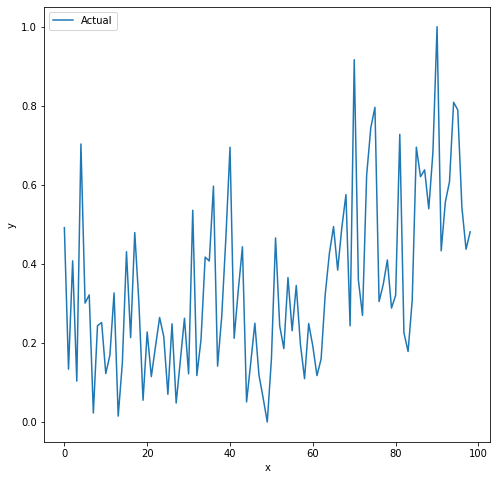

In [17]:
from sklearn.preprocessing import minmax_scale 

y_true = minmax_scale(df.iloc[1:100,8])

fig = plt.figure(figsize=(8,8)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성
 
ax.plot(np.arange(len(y_true)),y_true,label='Actual') ## 선그래프 생성

ax.legend()

plt.xlabel("x")
plt.ylabel("y")

plt.show()